## Observations and Insights

## Dependencies and starter code

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)


In [3]:
mouse_metadata

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16
...,...,...,...,...,...
244,z314,Stelasyn,Female,21,28
245,z435,Propriva,Female,12,26
246,z581,Infubinol,Female,24,25
247,z795,Naftisol,Female,13,29


In [4]:
study_results

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.000000,0
1,f932,0,45.000000,0
2,g107,0,45.000000,0
3,a457,0,45.000000,0
4,c819,0,45.000000,0
...,...,...,...,...
1888,r944,45,41.581521,2
1889,u364,45,31.023923,3
1890,p438,45,61.433892,1
1891,x773,45,58.634971,4


In [5]:
# Combine the data into a single dataset
complete_df = pd.merge(mouse_metadata, study_results, 
                                   how="left", on=["Mouse ID", 
                                                   "Mouse ID"])
complete_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


## Summary statistics

In [6]:
# Generate a summary statistics table of mean, median, variance, 
# standard deviation, and SEM of the tumor volume for each regimen

In [7]:
# Get the summary values for the tumor volume to input into a data frame
# Mean Value
mean_tv = complete_df.groupby('Drug Regimen').mean()['Tumor Volume (mm3)']
mean_tv

Drug Regimen
Capomulin    40.675741
Ceftamin     52.591172
Infubinol    52.884795
Ketapril     55.235638
Naftisol     54.331565
Placebo      54.033581
Propriva     52.322552
Ramicane     40.216745
Stelasyn     54.233149
Zoniferol    53.236507
Name: Tumor Volume (mm3), dtype: float64

In [8]:
# Median value
median_tv = complete_df.groupby('Drug Regimen').median()['Tumor Volume (mm3)']
median_tv

Drug Regimen
Capomulin    41.557809
Ceftamin     51.776157
Infubinol    51.820584
Ketapril     53.698743
Naftisol     52.509285
Placebo      52.288934
Propriva     50.854632
Ramicane     40.673236
Stelasyn     52.431737
Zoniferol    51.818479
Name: Tumor Volume (mm3), dtype: float64

In [9]:
# Variance value
var_tv = complete_df.groupby('Drug Regimen').var()['Tumor Volume (mm3)']
var_tv

Drug Regimen
Capomulin    24.947764
Ceftamin     39.290177
Infubinol    43.128684
Ketapril     68.553577
Naftisol     66.173479
Placebo      61.168083
Propriva     42.351070
Ramicane     23.486704
Stelasyn     59.450562
Zoniferol    48.533355
Name: Tumor Volume (mm3), dtype: float64

In [10]:
# Standard Deviation value
std_tv = complete_df.groupby('Drug Regimen').std()['Tumor Volume (mm3)']
std_tv

Drug Regimen
Capomulin    4.994774
Ceftamin     6.268188
Infubinol    6.567243
Ketapril     8.279709
Naftisol     8.134708
Placebo      7.821003
Propriva     6.507770
Ramicane     4.846308
Stelasyn     7.710419
Zoniferol    6.966589
Name: Tumor Volume (mm3), dtype: float64

In [11]:
# SEM Value
# Generate a new 30 vehicle sample and calculate the SEM of the sample
# Standard Deviation value
sem_tv = complete_df.groupby('Drug Regimen').sem()['Tumor Volume (mm3)']
sem_tv

Drug Regimen
Capomulin    0.329346
Ceftamin     0.469821
Infubinol    0.492236
Ketapril     0.603860
Naftisol     0.596466
Placebo      0.581331
Propriva     0.512884
Ramicane     0.320955
Stelasyn     0.573111
Zoniferol    0.516398
Name: Tumor Volume (mm3), dtype: float64

In [12]:
# Combine values into a data frame
summary_stats = pd.DataFrame({"Mean": mean_tv,
                             "Median": median_tv,
                             "Variance": var_tv,
                             "Standard Deviation": std_tv,
                             "Standard Error": sem_tv})
summary_stats


,Mean,Median,Variance,Standard Deviation,Standard Error
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar plots

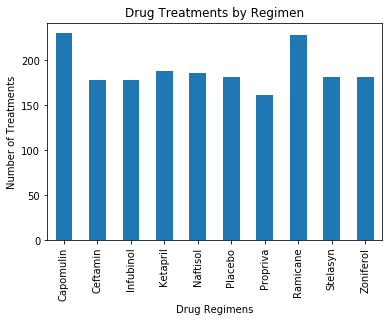

<Figure size 432x288 with 0 Axes>

In [13]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
# Create a group based on drug regimen values
drug_regimens = complete_df.groupby('Drug Regimen')
# Count how many times each maker appears in our group
count_reg = drug_regimens['Drug Regimen'].count()
# Create a bar chart based off of these values
dr_barchart = count_reg.plot(kind='bar', title="Drug Treatments by Regimen")
dr_barchart.set_xlabel("Drug Regimens")
dr_barchart.set_ylabel("Number of Treatments")

plt.show()
plt.tight_layout()


In [14]:
drug_regs = complete_df['Drug Regimen'].unique()
drug_regs.sort()
drug_regs

array(['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol',
       'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'],
      dtype=object)

In [15]:
count_reg = drug_regimens['Drug Regimen'].count()
count_reg

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     161
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Drug Regimen, dtype: int64

<BarContainer object of 10 artists>

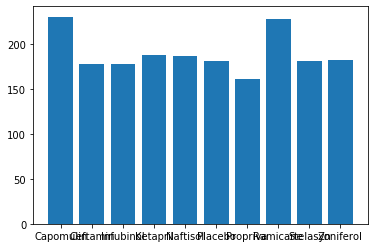

In [101]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
drug_regs = complete_df['Drug Regimen'].unique()
# Count how many times each maker appears in our group
# count_reg = drug_regimens_df['Drug Regimen'].count()
count_reg = drug_regimens['Drug Regimen'].count()
x_axis = np.sort(drug_regs)
# type(drug_regs)
y_axis = count_reg
plt.bar(x_axis, y_axis, align="center")

## Pie plots

In [18]:
# Generate pie plots showing the distribution of female versus male mice

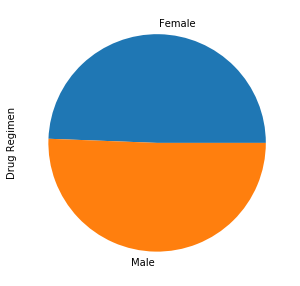

In [19]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
# Split up data into groups based on sex
gender_groups = complete_df.groupby('Sex')
# Find out how many tests were completed on each of the sexes
gender_tests = gender_groups['Drug Regimen'].count()
genders_plot = gender_tests.plot(kind="pie", subplots=True, figsize=(5,5))

#plt.tight_layout()
# plt.axis("equal")
# plt.show()

([<matplotlib.patches.Wedge at 0x1a21430090>,
 [Text(0.020992503472585564, 1.0997996703027118, 'Male Mice'),
  Text(-0.020992503472586185, -1.0997996703027118, 'Female Mice')],
 [Text(0.011450456439592124, 0.5998907292560246, '49.4%'),
  Text(-0.011450456439592464, -0.5998907292560246, '50.6%')])

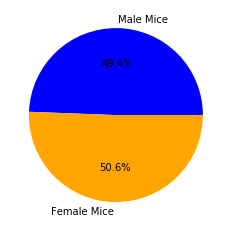

In [20]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Male Mice", "Female Mice"]
colors = ['blue', 'orange']
# Tell matplotlib to create a pie chart based upon the above data
plt.pie(gender_tests, labels=labels, colors=colors,
        autopct="%1.1f%%")

## Quartiles, outliers and boxplots

In [ ]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens: 
# Capomulin, Ramicane, Infubinol, and Ceftamin. 
# Calculate the quartiles and IQR and quantitatively determine 
# if there are any potential outliers across all four treatment regimens.

In [131]:
# One way to retrieve the values for the final tumor volume would be to retrieve the max value of all the columns, 
# in order to isolate the highest record for each mouse's final recorded timepoint and tumor volume.
# This assumes that the max timepoint is also the final timepoint.
new_df = complete_df.groupby(["Mouse ID"]).max()
new_df

,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
a203,Infubinol,Female,20,23,45,67.973419,2
a251,Infubinol,Female,21,25,45,65.525743,1
a262,Placebo,Female,17,29,45,70.717621,4
a275,Ceftamin,Female,20,28,45,62.999356,3
a366,Stelasyn,Female,16,29,30,63.440686,1
...,...,...,...,...,...,...,...
z435,Propriva,Female,12,26,10,48.710661,0
z578,Ramicane,Male,11,16,45,45.000000,0
z581,Infubinol,Female,24,25,45,62.754451,3


In [136]:
timepoints_df=pd.merge(complete_df, new_df, on=["Mouse ID", "Timepoint"])
timepoints_df.head(50)

,Mouse ID,Drug Regimen_x,Sex_x,Age_months_x,Weight (g)_x,Timepoint,Tumor Volume (mm3)_x,Metastatic Sites_x,Drug Regimen_y,Sex_y,Age_months_y,Weight (g)_y,Tumor Volume (mm3)_y,Metastatic Sites_y
0,k403,Ramicane,Male,21,16,45,22.050126,1,Ramicane,Male,21,16,45.000000,1
1,s185,Capomulin,Female,3,17,45,23.343598,1,Capomulin,Female,3,17,45.000000,1
2,x401,Capomulin,Female,16,15,45,28.484033,0,Capomulin,Female,16,15,45.473753,0
3,m601,Capomulin,Male,22,17,45,28.430964,1,Capomulin,Male,22,17,45.000000,1
4,g791,Ramicane,Male,11,16,45,29.128472,1,Ramicane,Male,11,16,45.851531,1
5,s508,Ramicane,Male,1,17,45,30.276232,0,Ramicane,Male,1,17,45.000000,0
6,f966,Capomulin,Male,16,17,20,30.485985,0,Capomulin,Male,16,17,45.000000,0
7,m546,Ramicane,Male,18,16,45,30.564625,1,Ramicane,Male,18,16,45.000000,1
8,z578,Ramicane,Male,11,16,45,30.638696,0,Ramicane,Male,11,16,45.000000,0
9,j913,Ramicane,Female,4,17,45,31.560470,1,Ramicane,Female,4,17,45.252534,1


In [132]:
# From here, capture the values for the Capomulin drug regimen
max_Cap_df = new_df.loc[(new_df["Drug Regimen"] == "Capomulin"),:]
max_Cap_df

,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
b128,Capomulin,Female,9,22,45,45.651331,2
b742,Capomulin,Male,7,21,45,45.000000,0
f966,Capomulin,Male,16,17,20,45.000000,0
g288,Capomulin,Male,3,19,45,46.304003,1
g316,Capomulin,Female,22,22,45,46.809225,2
i557,Capomulin,Female,1,24,45,47.685963,1
i738,Capomulin,Female,23,20,45,45.595685,2
j119,Capomulin,Female,7,23,45,48.158209,1
j246,Capomulin,Female,21,21,35,46.408361,1


In [125]:
tvs_Ca = max_Cap_df["Tumor Volume (mm3)"].values.tolist()
tvs_Ca

[45.65133131,
 45.0,
 45.0,
 46.30400254,
 46.80922469,
 47.68596303,
 45.59568527,
 48.15820939,
 46.408361299999996,
 48.07045162,
 46.15473721,
 45.0,
 46.414517700000005,
 46.53920617,
 45.78174579,
 47.37342325,
 45.0,
 45.0,
 46.74900552,
 47.21219992,
 45.70443431,
 45.0,
 45.89372032,
 45.47375302,
 45.0]

In [126]:
quartiles = max_Cap_df["Tumor Volume (mm3)"].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of tumor volume is: {lowerq}")
print(f"The upper quartile of tumor volume is: {upperq}")
print(f"The interquartile range of tumor volume is: {iqr}")
print(f"The the median tumor volume is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of tumor volume is: 45.0
The upper quartile of tumor volume is: 46.74900552
The interquartile range of tumor volume is: 1.7490055199999972
The the median tumor volume is: 45.89372032 
Values below 42.376491720000004 could be outliers.
Values above 49.37251379999999 could be outliers.


<Figure size 1440x432 with 0 Axes>

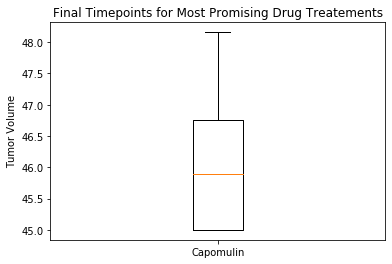

<Figure size 432x288 with 0 Axes>

In [130]:
# This plot worked!!
fig1 = plt.figure(1, figsize=(20, 6))
fig1, ax1 = plt.subplots()
ax1.set_title('Final Timepoints for Most Promising Drug Treatements')
ax1.set_xticklabels(['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])
ax1.set_ylabel('Tumor Volume')
ax1.boxplot(tvs_Ca)
plt.show()
plt.savefig("../box_whisker.png")

In [ ]:
# 

In [99]:
# # Retrieve data for the following drug regimens: Capomulin, Ramicane, Infubinol, and Ceftamin
# Resource = http://blog.bharatbhole.com/creating-boxplots-with-matplotlib/
drugCa = []

## combine these different collections into a list    
if complete_df["Drug Regimen"]=="Capomulin" & complete_df["Timepoint"]==complete_df[]

# complete_df.loc[(complete_df["Drug Regimen"] == "Capomulin") & new_df["Timepoint"].max() ,:]
# drugR_df = complete_df.loc[(complete_df["Drug Regimen"] == "Ramicane") & (complete_df["Timepoint"][-1]),:]
# drugI_df = complete_df.loc[(complete_df["Drug Regimen"] == "Infubinol") & (complete_df["Timepoint"][-1]),:]
# drugCe_df = complete_df.loc[(complete_df["Drug Regimen"] == "Ceftamin") & (complete_df["Timepoint"][-1]),:]


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
...,...,...,...,...,...,...,...,...
440,i557,Capomulin,Female,1,24,45,47.685963,1
1452,r157,Capomulin,Male,22,25,0,45.000000,0
1453,r157,Capomulin,Male,22,25,5,45.597064,0
1454,r157,Capomulin,Male,22,25,10,46.059608,0


In [94]:
drugCa_df = complete_df.loc[(complete_df["Drug Regimen"] == "Capomulin") & complete_df.loc[(complete_df["Timepoint"] == "Capomulin") ,:]
drugCa_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
...,...,...,...,...,...,...,...,...
440,i557,Capomulin,Female,1,24,45,47.685963,1
1452,r157,Capomulin,Male,22,25,0,45.000000,0
1453,r157,Capomulin,Male,22,25,5,45.597064,0
1454,r157,Capomulin,Male,22,25,10,46.059608,0


In [68]:
# Convert these data frames into a list
tvs_Ca = drugCa_df["Tumor Volume (mm3)"].values.tolist()
tvs_R = drugR_df["Tumor Volume (mm3)"].values.tolist()
tvs_I = drugI_df["Tumor Volume (mm3)"].values.tolist()
tvs_Ce = drugCe_df["Tumor Volume (mm3)"].values.tolist()
# Combine all these lists into one list for the scatter plot
data_to_plot = [tvs_Ca, tvs_R, tvs_I, tvs_Ce]

In [104]:
# Generate a box plot of the final tumor volume of 
# each mouse across four regimens of interest

fig1 = plt.figure(1, figsize=(20, 6))
fig1, ax1 = plt.subplots(data_to_plot)
ax1.set_title('Final Timepoints for Most Promising Drug Treatements')
ax1.set_xticklabels(['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])
ax1.set_ylabel('Tumor Volume')
ax1.boxplot(data_to_plot)
plt.show()
plt.savefig("../box_whisker.png")

TypeError: 'list' object cannot be interpreted as an integer

<Figure size 1440x432 with 0 Axes>

<Figure size 432x288 with 0 Axes>

## Line and scatter plots

Text(0.5, 1.0, 'Tumor Volume of Mouse ID s185')

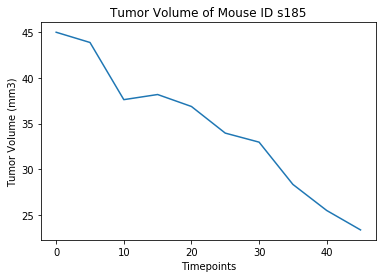

In [48]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
# Retrieve the data for the one mouse
drug_reg_single_mouse = complete_df.loc[(complete_df["Drug Regimen"] == "Capomulin")&(complete_df["Mouse ID"] == "s185")]
plt.plot(drug_reg_single_mouse["Timepoint"],drug_reg_single_mouse["Tumor Volume (mm3)"])
# cap_mouse = complete_df.loc[(complete_df["Drug Regimen"] == "Capomulin")
# cap_mouse.head()
plt.xlabel("Timepoints")
plt.ylabel("Tumor Volume (mm3)")  
plt.title("Tumor Volume of Mouse ID s185")
                 

In [38]:
drug_reg_Ca = complete_df.loc[(complete_df["Drug Regimen"] == "Capomulin")]
mouseID = drug_reg_Ca.groupby(['Mouse ID'])
drug_reg_Ca.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0


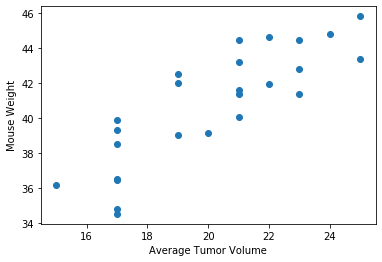

In [33]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
x_values = mouseID["Weight (g)"].mean()
y_values = mouseID["Tumor Volume (mm3)"].mean()
plt.scatter(x_values,y_values)
plt.xlabel('Average Tumor Volume')
plt.ylabel('Mouse Weight')
plt.show()  
plt.title("")

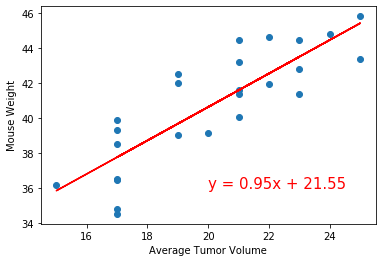

In [37]:
# Calculate the correlation coefficient and 
# linear regression model for mouse weight and average 
# tumor volume for the Capomulin regimen
# Add the linear regression equation and line to plot
x_values = mouseID["Weight (g)"].mean()
y_values = mouseID["Tumor Volume (mm3)"].mean()
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20, 36),fontsize=15,color="red")
plt.xlabel('Average Tumor Volume')
plt.ylabel('Mouse Weight')
plt.show()